Q1. How does bagging reduce overfitting in decision trees?

Bagging (Bootstrap Aggregating) is an ensemble method that reduces overfitting in decision trees by:

Creating diverse models: Each model in the ensemble is trained on a different subset of the data (bootstrap sample), sampled with replacement. This means some data points appear multiple times in a sample, while others don't appear at all. This diversity in training data leads to diverse models.
Reducing variance: By combining the predictions of multiple diverse models, bagging reduces the variance of the final prediction. Overfitting often leads to high variance, as the model is too sensitive to the training data. Bagging helps to smooth out these fluctuations.
Decreasing dependence on individual trees: A single decision tree can be highly sensitive to small changes in the data, leading to overfitting. In bagging, the final prediction is based on the combined output of multiple trees, reducing the impact of any single tree's overfitting.


Accuracy of Single Decision Tree: 0.67
Accuracy of Bagging (with Decision Trees): 0.69


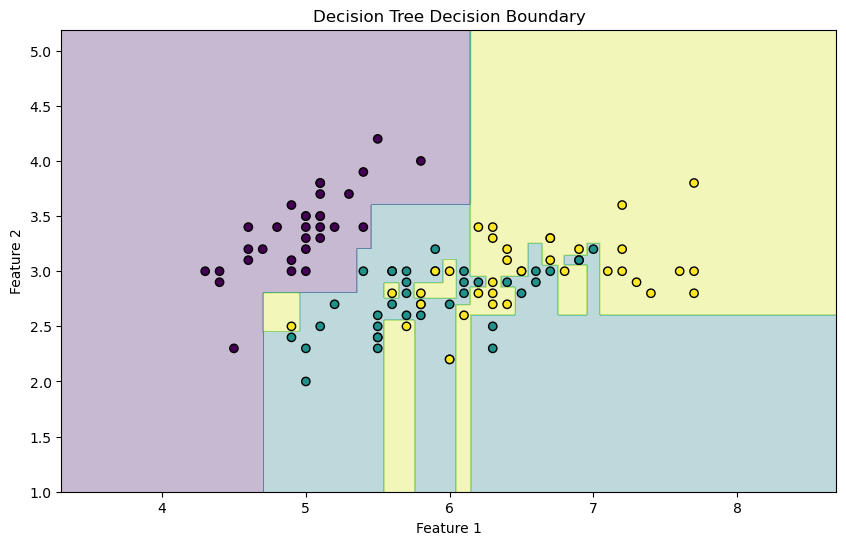

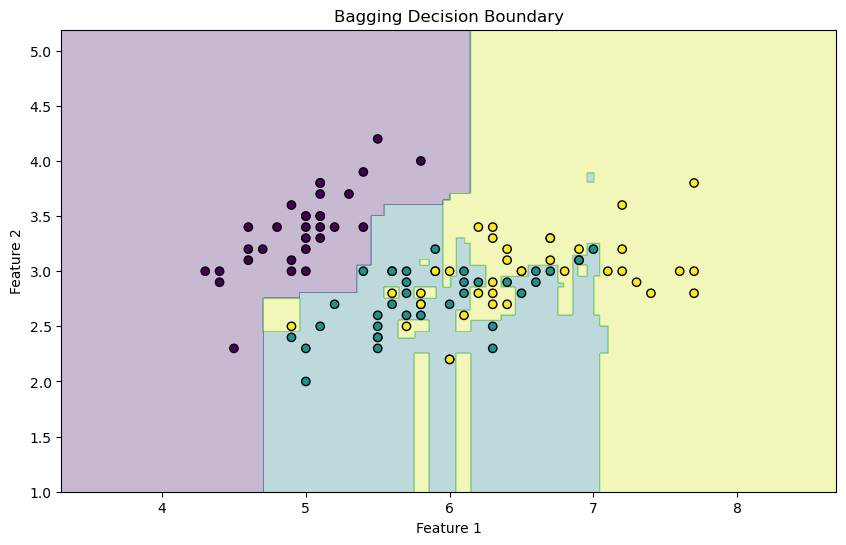

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Reduce the dimensionality to 2 features for visualization
X_reduced = X[:, :2]

# Split the reduced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

# Initialize a DecisionTreeClassifier and BaggingClassifier with 2 features
dt_clf = DecisionTreeClassifier(random_state=42)
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), 
                                n_estimators=100, 
                                random_state=42)

# Train the models
dt_clf.fit(X_train, y_train)
bagging_clf.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_clf.predict(X_test)
y_pred_bagging = bagging_clf.predict(X_test)

# Evaluate the accuracy of both models
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)

print(f"Accuracy of Single Decision Tree: {accuracy_dt:.2f}")
print(f"Accuracy of Bagging (with Decision Trees): {accuracy_bagging:.2f}")

# Plotting decision boundaries for visualization
def plot_decision_boundaries(X, y, model, title):
    plt.figure(figsize=(10, 6))
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Plot decision boundaries using the reduced feature set
plot_decision_boundaries(X_train, y_train, dt_clf, "Decision Tree Decision Boundary")
plot_decision_boundaries(X_train, y_train, bagging_clf, "Bagging Decision Boundary")

Q2. What are the advantages and disadvantages of using different types of base learners in bagging?

Advantages:   

Improved performance: Different base learners can capture different patterns in the data. Combining them can lead to better overall performance.
Reduced bias: Using a variety of base learners can help to reduce bias, as different models might have different biases.
Increased robustness: A diverse set of base learners can make the ensemble more robust to changes in the data distribution.


Disadvantages:

Increased complexity: Using multiple types of base learners can increase the complexity of the model and make it harder to interpret.
Computational cost: Training multiple base learners can be computationally expensive.
Hyperparameter tuning: More hyperparameters need to be tuned for multiple base learners.


Q3. How does the choice of base learner affect the bias-variance tradeoff in bagging?


The choice of base learner significantly impacts the bias-variance tradeoff in bagging:

High-bias base learners: These learners tend to underfit the training data but have low variance. Examples include linear models. Using such base learners in bagging might not significantly reduce variance and could lead to a higher overall bias.
Low-bias base learners: These learners tend to overfit but have low bias. Decision trees are a common example. Using such base learners in bagging can effectively reduce variance while maintaining low bias.
Generally, low-bias base learners are preferred for bagging as they can effectively address the overfitting issue and improve overall model performance.

Q4. Can bagging be used for both classification and regression tasks? How does it differ in each case?


Yes, bagging can be used for both classification and regression tasks.

Classification: The predictions of the base classifiers are combined through voting. The class with the highest number of votes is the predicted class.
Regression: The predictions of the base regressors are combined by averaging their outputs. The average value is the predicted value.
The underlying principle of bagging remains the same in both cases: creating multiple models on different subsets of the data and combining their predictions to improve performance.




Q5. What is the role of ensemble size in bagging? How many models should be included in the ensemble?



The ensemble size in bagging determines the number of base models combined to make the final prediction.   

Increasing ensemble size generally leads to better performance by reducing variance.
However, there's a diminishing return: After a certain point, adding more models doesn't significantly improve performance.
Computational cost also increases with ensemble size.
The optimal number of models depends on the specific problem and dataset. In practice, it's often determined through cross-validation or experimentation. Typically, an ensemble size of 100-200 models is a reasonable starting point.


Q6. Can you provide an example of a real-world application of bagging in machine learning?


Fraud detection is a common application of bagging.

Problem: Identifying fraudulent transactions from a large dataset.
Solution: Bagging can be used to create an ensemble of decision trees, each trained on a different subset of transaction data. The ensemble can then be used to classify new transactions as fraudulent or legitimate.
Benefits: Bagging can help to improve the accuracy of fraud detection by reducing the risk of overfitting and capturing complex patterns in the data.

Q7- The output of a Random Forest Regressor is a continuous numerical value.

   

Unlike Random Forest Classifiers which output class probabilities or predicted class labels, the Regressor version provides a numerical prediction. This output represents the average prediction of all the decision trees in the forest for a given input data point.   

Key points:

Continuous value: The output is a real number.
Average prediction: It's the mean of the predictions from all individual trees in the forest.   
This makes it suitable for tasks where you need to predict a quantity, such as house prices, sales figures, or temperature. 




 Q8. Can Random Forest Regressor be used for classification tasks?

The RandomForestRegressor is specifically designed for regression tasks, meaning it predicts continuous values. For classification tasks, Scikit-learn provides the RandomForestClassifier, which is designed to handle categorical outcomes.

Key Differences:


RandomForestRegressor: Used for predicting continuous values. The output is a continuous variable.
RandomForestClassifier: Used for predicting categorical outcomes. The output is a class label.

Accuracy of RandomForestClassifier: 1.00
Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        19
     class_1       1.00      1.00      1.00        21
     class_2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



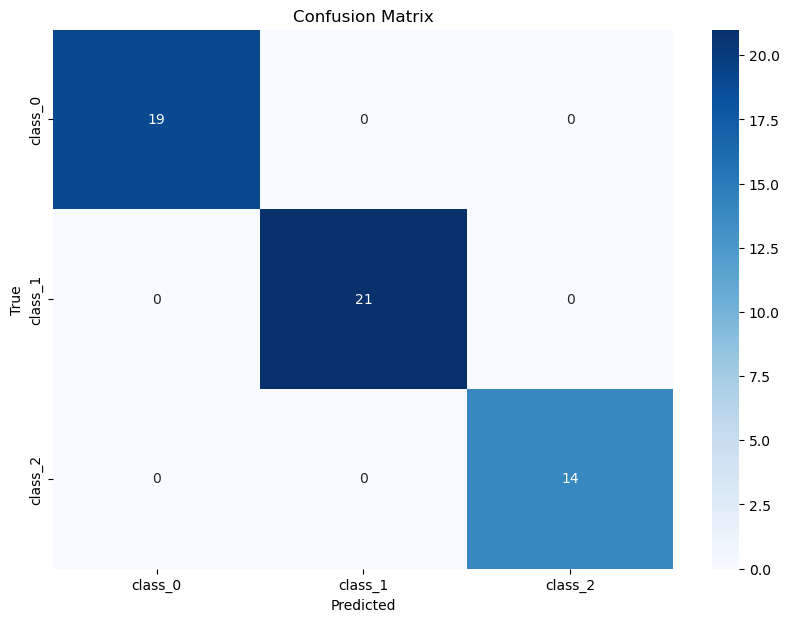

In [3]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Wine dataset
data = load_wine()
X = data.data
y = data.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of RandomForestClassifier: {accuracy:.2f}")

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
